In [1]:
import os, sys
currentFolder = os.path.abspath('')
try:
    sys.path.remove(str(currentFolder))
except ValueError: # Already removed
    pass

projectFolder = 'C:/Users/abjaw/Documents/GitHub/junction-art'
sys.path.append(str(projectFolder))
os.chdir(projectFolder)
print( f"current working dir{os.getcwd()}")

current working dirC:\Users\abjaw\Documents\GitHub\junction-art


In [2]:
from junctions.JunctionBuilderFromPointsAndHeading import JunctionBuilderFromPointsAndHeading
from junctionart.draw.IntersectionDrawer import IntersectionDrawer
import math
import matplotlib.pyplot as plt

In [15]:
from library.Configuration import Configuration
from junctions.SequentialJunctionBuilder import SequentialJunctionBuilder
from junctions.IntersectionValidator import IntersectionValidator
from junctions.LaneConfiguration import LaneConfigurationStrategies
import pyodrx
import extensions
import numpy as np

configuration = Configuration()
outputDir= os.path.join(os.getcwd(), 'output')
lastId = 0
seed = 1
builder = SequentialJunctionBuilder(minAngle=np.pi/10, 
                                    maxAngle=np.pi * .75, 
                                    straightRoadLen=5, 
                                    probLongConnection=0.5, 
                                    probMinAngle=0.5, 
                                    probRestrictedLane=0.2,
                                    maxConnectionLength=50, 
                                    minConnectionLength=20,
                                    random_seed=seed)

randomState =configuration.get("random_state")
validator = IntersectionValidator()

intersection_array = []

maxNumberOfRoadsPerJunction = 3
minLanePerSide = 0
maxLanePerSide = 1

for sl in range(20):
    path = configuration.get("harvested_straight_roads")
    intersection = builder.createWithRandomLaneConfigurations(path, 
                        sl, 
                        maxNumberOfRoadsPerJunction=maxNumberOfRoadsPerJunction, 
                        maxLanePerSide=maxLanePerSide, 
                        minLanePerSide=minLanePerSide, 
                        internalConnections=True, 
                        cp1=pyodrx.ContactPoint.end,
                        internalLinkStrategy = LaneConfigurationStrategies.SPLIT_ANY,
                        getAsOdr=False)
    intersection_array.append(intersection)


intersection i  0 True


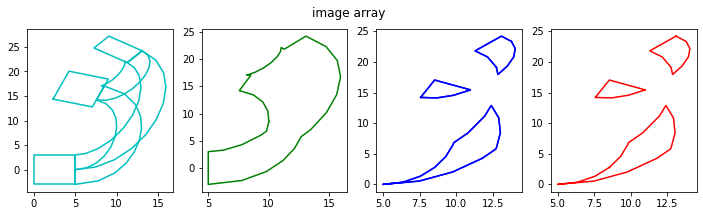

intersection area value  132.34336737395242
overlap area value  37.155259445654096
intersection i  1 True


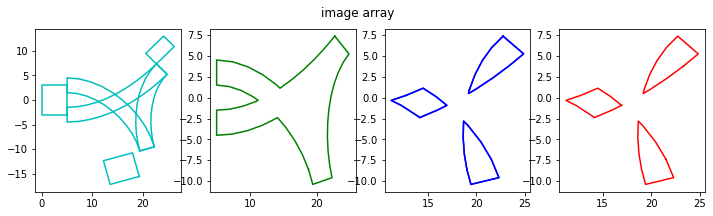

intersection area value  141.93172212024197
overlap area value  39.30569745625713
intersection i  2 True


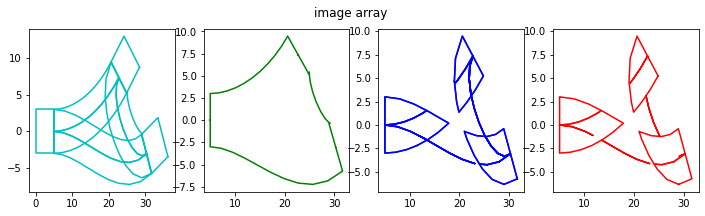

intersection area value  254.76118057912686
overlap area value  110.52258806775897
intersection i  3 True


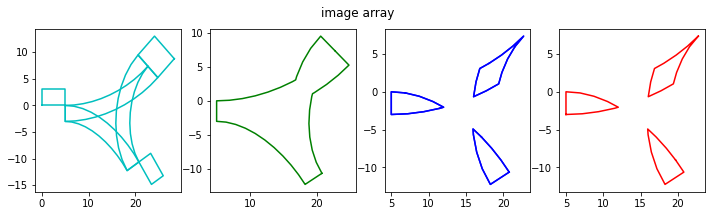

intersection area value  138.85783775333206
overlap area value  42.19418698447781
intersection i  4 True


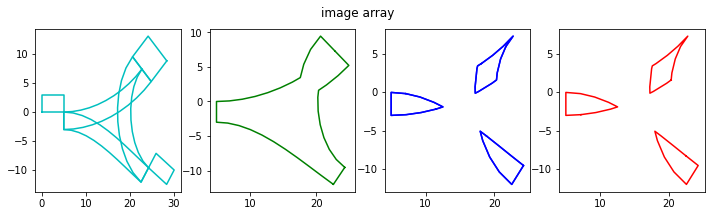

intersection area value  146.06427942067089
overlap area value  42.9493265159778
intersection i  5 True


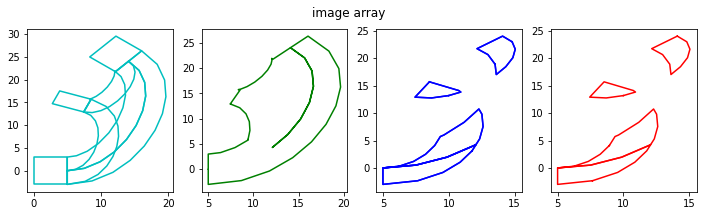

intersection area value  217.8480098348858
overlap area value  52.9074899178947
intersection i  6 True


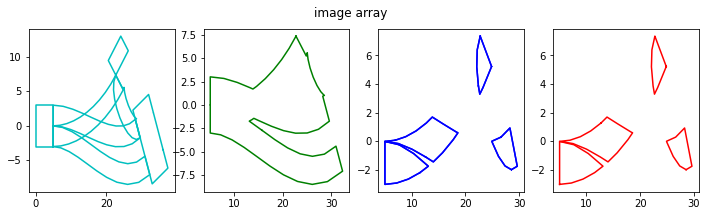

intersection area value  200.10153146129366
overlap area value  46.48296452607367
intersection i  7 True


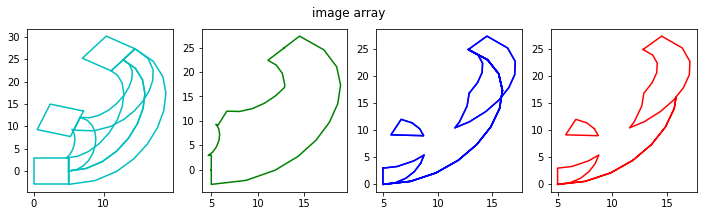

intersection area value  219.72711516345092
overlap area value  56.18262073579215
intersection i  8 False
intersection i  9 True


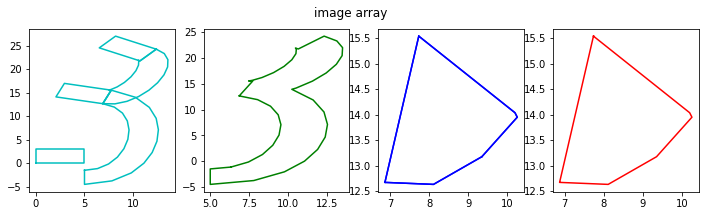

intersection area value  90.84922453578645
overlap area value  5.469229983850269
intersection i  10 True


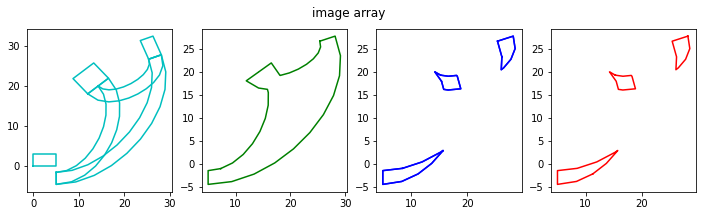

intersection area value  228.08693645911706
overlap area value  45.822824156859944
intersection i  11 True


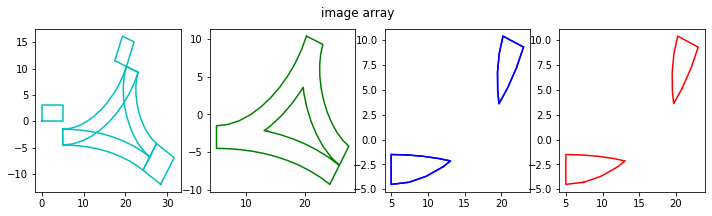

intersection area value  151.70599941414787
overlap area value  28.71919145802932
intersection i  12 True


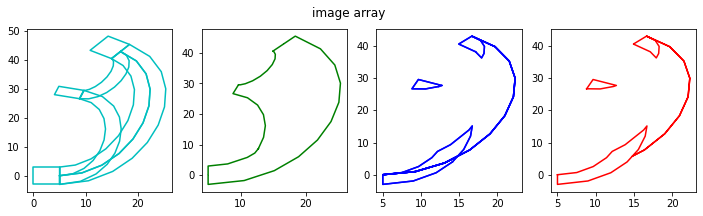

intersection area value  403.8666589887024
overlap area value  67.55806004702109
intersection i  13 True


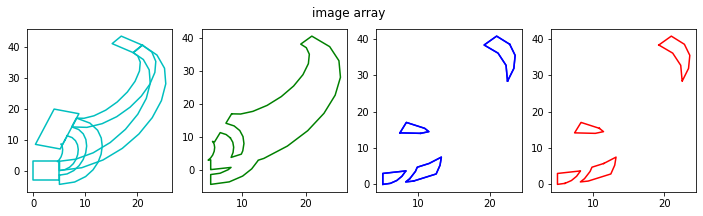

intersection area value  283.42371053792806
overlap area value  47.707558540014816
intersection i  14 True


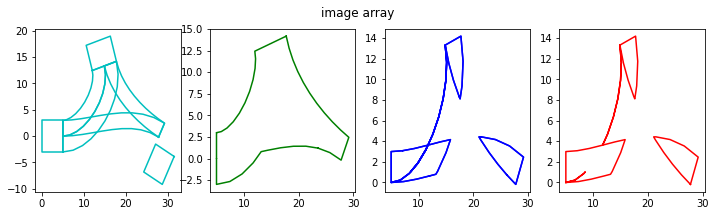

intersection area value  179.34009660506558
overlap area value  56.33777665119326
intersection i  15 True


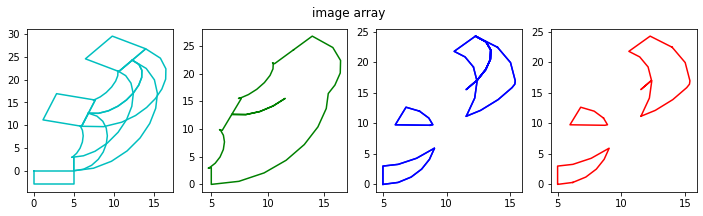

intersection area value  155.26477115419695
overlap area value  46.19229889227777
intersection i  16 True


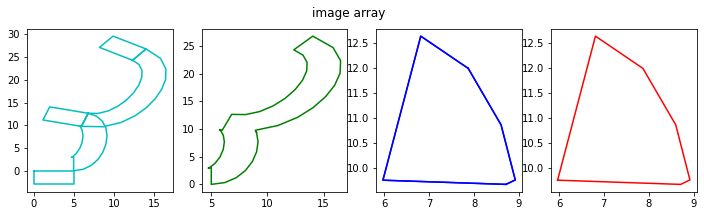

intersection area value  85.63255348406052
overlap area value  5.4366248289165044
intersection i  17 True


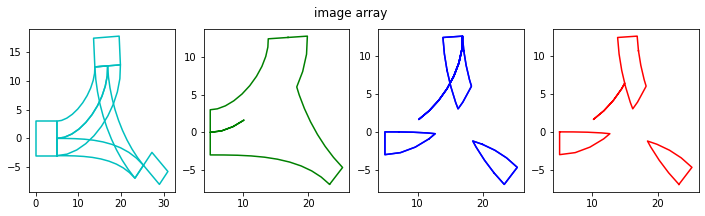

intersection area value  181.26759078718692
overlap area value  54.7796419524418
intersection i  18 True


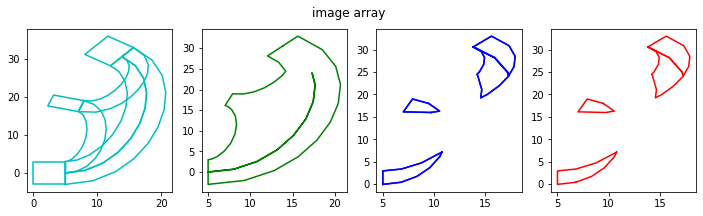

intersection area value  283.4560671082329
overlap area value  52.3744568421165
intersection i  19 True


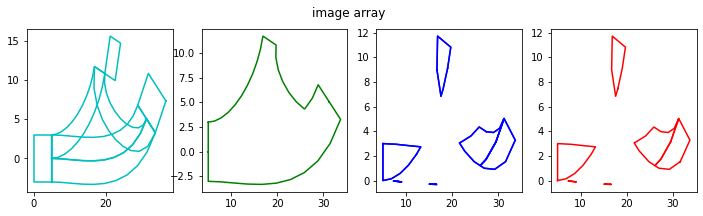

intersection area value  224.69304427186424
overlap area value  52.5262265649672


In [16]:
for intersection in intersection_array:
    isValid = validator.validateIncidentPoints(intersection, builder.minConnectionLength)
    print('intersection i ', intersection.id ,isValid)

    if isValid:
        intersection_drawer = IntersectionDrawer(intersection, step=0.1)
        intersection_drawer.draw_polygon_image_arr(include_u_turn=True)
        intersection_drawer.get_area_values(include_u_turn=False)


In [5]:
# from junctionart.draw.IntersectionDrawer import IntersectionDrawer
# intersection_drawer = IntersectionDrawer(intersection_array[3], 0.5)
# intersection_drawer.draw_polygon_image_arr(include_u_turn=True)


In [6]:
# intersection_drawer = IntersectionDrawer(intersection_array[0], 0.3)
# intersection_drawer.draw_polygon_image_arr()